In [ ]:
!pip install graphviz IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


In [ ]:
dataset = [
    [-1, -1, -6.33333],
    [-1, 0, -6],
    [-1, 1, -5.66667],
    [-1, 2, -5.33333],
    [-1, 3, -5],
    [-1, 4, -4.66667],
    [-1, 5, -4.33333],
    [0, -1, -4.33333],
    [0, 0, -4],
    [0, 1, -3.66667],
    [0, 2, -3.33333],
    [0, 3, -3],
    [0, 4, -2.66667],
    [0, 5, -2.33333],
    [1, -1, -2.33333],
    [1, 0, -2],
    [1, 1, -1.66667],
    [1, 2, -1.33333],
    [1, 3, -1],
    [1, 4, -0.666667],
    [1, 5, -0.333333],
    [2, -1, -0.333333],
    [2, 0, 0],
    [2, 1, 0.333333],
    [2, 2, 0.666667],
    [2, 3, 1],
    [2, 4, 1.33333],
    [2, 5, 1.66667],
    [3, -1, 1.66667],
    [3, 0, 2],
    [3, 1, 2.33333],
    [3, 2, 2.66667],
    [3, 3, 3],
    [3, 4, 3.33333],
    [3, 5, 3.66667],
    [4, -1, 3.66667],
    [4, 0, 4],
    [4, 1, 4.33333],
    [4, 2, 4.66667],
    [4, 3, 5],
    [4, 4, 5.33333],
    [4, 5, 5.66667],
    [5, -1, 5.66667],
    [5, 0, 6],
    [5, 1, 6.33333],
    [5, 2, 6.66667],
    [5, 3, 7],
    [5, 4, 7.33333],
    [5, 5, 7.66667],
]

print("Dataset initialized")


Dataset initialized


 Printing initial fitness [16.888886675743777, 16.888889165539695, 36.888889165539695, 16.982221336968262, 36.55555749207031, 16.66222233288664, 63.22222083900908, 281.88890161451934, 23.55555306576646, 17.36822683277325, 35.222218349213165, 534.2222009206419, 54.062216855335606, 16.734126430845812, 6.222220839009083, 19.482103344678016, 13.888889165539695, 6.008887173702961, 12.722222675743774, 73.88888169615194]
Progress at generation:  0  Fitness:  4.555555002274389
________________________
Best Generation: 0, Best Fitness: 4.556000
________________________
Best Generation: 5, Best Fitness: 4.472000
________________________
Best Generation: 6, Best Fitness: 0.556000
Progress at generation:  10  Fitness:  1.5079351247233672
________________________
Best Generation: 16, Best Fitness: 0.444000
Progress at generation:  20  Fitness:  0.251735903634932
________________________
Best Generation: 20, Best Fitness: 0.252000
________________________
Best Generation: 26, Best Fitness: 0.236000


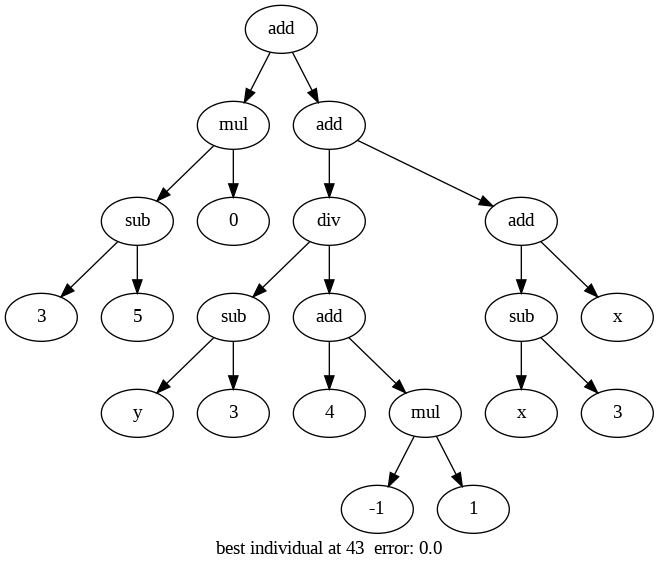

Final Prefix Equation:  (add (mul (sub 3 5) 0) (add (div (sub y 3) (add 4 (mul -1 1))) (add (sub x 3) x)))
Final Post Equation:  (((3 5 sub) 0 mul) (((y 3 sub) (4 (-1 1 mul) add) div) ((x 3 sub) x add) add) add)


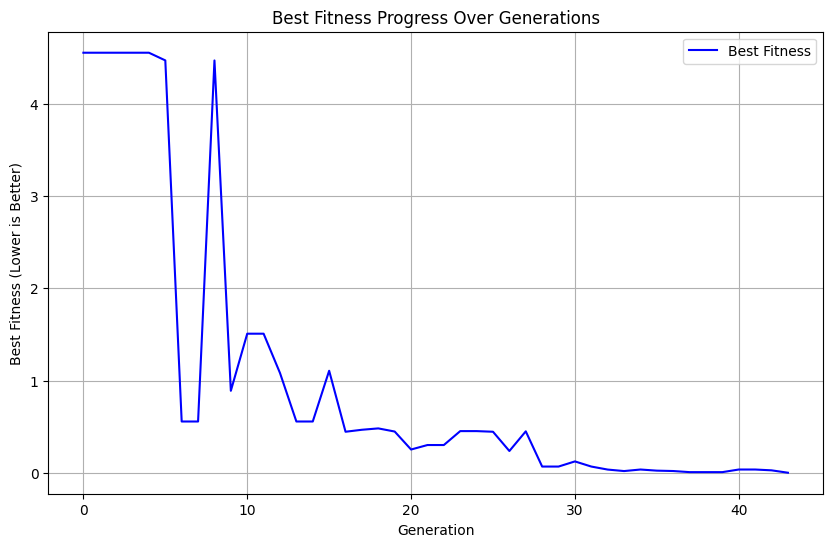

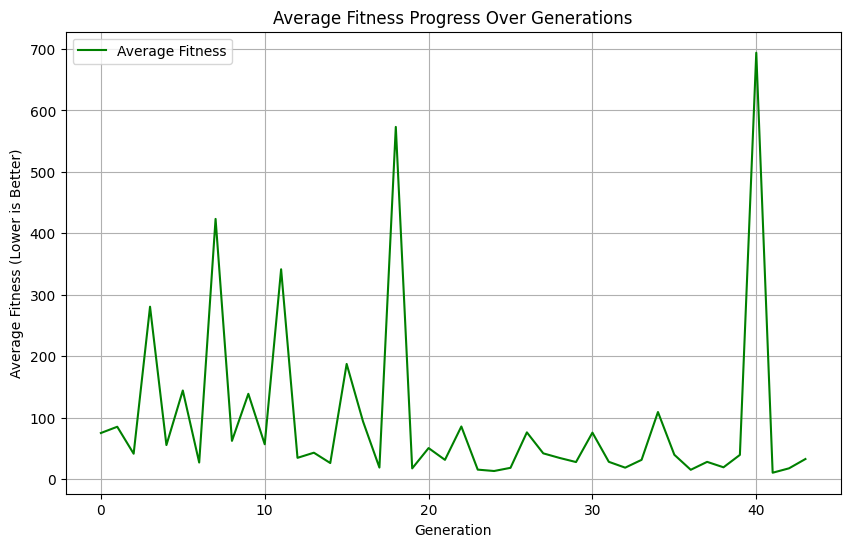

  Input X    Input Y    Predicted Output    Actual Output
---------  ---------  ------------------  ---------------
       -1         -1           -6.33333         -6.33333
       -1          0           -6               -6
       -1          1           -5.66667         -5.66667
       -1          2           -5.33333         -5.33333
       -1          3           -5               -5
       -1          4           -4.66667         -4.66667
       -1          5           -4.33333         -4.33333
        0         -1           -4.33333         -4.33333
        0          0           -4               -4
        0          1           -3.66667         -3.66667
        0          2           -3.33333         -3.33333
        0          3           -3               -3
        0          4           -2.66667         -2.66667
        0          5           -2.33333         -2.33333
        1         -1           -2.33333         -2.33333
        1          0           -2               -2
  

In [ ]:
from random import random, randint, seed
from statistics import mean
from copy import deepcopy
from IPython.display import Image, display
from graphviz import Digraph, Source
import os
from tabulate import tabulate
import matplotlib.pyplot as plt


POP_SIZE = 60  # population size
MIN_DEPTH = 2  # minimal initial random tree depth
MAX_DEPTH = 2  # maximal initial random tree depth
XO_RATE = 0.8  # crossover rate
TOURNAMENT_SIZE = 5  # size of population for selection of  individuals for crossover.
PROB_MUTATION = 0.2  # per-node mutation probability
GENERATIONS = 150  # maximal number of generations to run evolution
DESIRED_PRECISION = 0.00001


def add(x, y):
    return x + y


def sub(x, y):
    return x - y


def mul(x, y):
    return x * y


def div(x, y):
    if y > 0:
        return x / y
    else:
        return 1


FUNCTIONS = [add, sub, mul, div]
TERMINALS = ["x", "y", -1, 0, 1, 2, 3, 4, 5]  # range [-1,5]


class GPTree:
    def __init__(self, data=None, left=None, right=None):
        """
        Initialize a new node for the genetic programming tree.

        Args:
            data: The data to be stored in the node. This can be a function or a terminal.
            left (GPTree, optional): The left child of the node. Defaults to None.
            right (GPTree, optional): The right child of the node. Defaults to None.
        """
        self.data = data
        self.left = left
        self.right = right

    def equation(self,notation):
        """
        Convert the tree to a string representation of the equation.

        This method recursively traverses the tree and generates a string that represents the equation.
        If the node's data is a function, it recursively calls this method on the left and right children
        and combines the results with the function's name. If the node's data is a terminal, it simply
        converts the terminal to a string.

        Returns:
            str: A string representation of the equation.
        """
        if self.data in FUNCTIONS:
            # If the node's data is a function, recursively call this method on the left and right children
            # and combine the results with the function's name.
            left_eqn = self.left.equation(notation)
            right_eqn = self.right.equation(notation)
            if notation == 'prefix':
                return f"({self.data.__name__} {left_eqn} {right_eqn})"
            elif notation == 'postfix':
                return f"({left_eqn} {right_eqn} {self.data.__name__})"
            else:
                raise ValueError("notation must be either 'prefix' or 'postfix'")
        else:
            # If the node's data is a terminal, convert the terminal to a string.
            return str(self.data)

    def node_label(self):
        """
        Generate a string label for the current node.

        If the node's data is a function, this method returns the function's name.
        If the node's data is a terminal, it converts the terminal to a string.

        Returns:
            str: A string label for the node.
        """
        if self.data in FUNCTIONS:
            return self.data.__name__
        else:
            return str(self.data)

    def print_tree(self, prefix=""):
        """
        Print a textual representation of the tree.

        This method recursively traverses the tree and prints each node.
        It prefixes each node with a string that represents the node's depth and
        whether it's a left or right child, creating a visual representation of the tree's structure.

        Args:
            prefix (str, optional): The prefix to print before the node's label. Defaults to "".
        """

        print("%s%s" % (prefix, self.node_label()))
        # If a left child exists, recursively print it with a prefix l
        if self.left:
            self.left.print_tree(prefix + "l  ")
        # If a right child exists, recursively print it with a prefix r
        if self.right:
            self.right.print_tree(prefix + "r   ")

    def random_tree(self, grow, max_depth, depth=0):
        """
        Create a random tree using either the grow or full method.

        This method recursively constructs a random tree. The tree's structure and the nodes' data are determined
        by the `grow` parameter, the `max_depth` parameter, and the current `depth`.

        Args:
            grow (bool): If True, the tree will be constructed using the grow method. If False, the full method will be used.
            max_depth (int): The maximum depth of the tree.
            depth (int, optional): The current depth of the recursion. Defaults to 0.
        """

        # Select a random function if depth is less than MIN_DEPTH or if full method is used and depth is less than max_depth.
        if depth < MIN_DEPTH or (depth < max_depth and not grow):
            self.data = FUNCTIONS[randint(0, len(FUNCTIONS) - 1)]
        # If the current depth is greater than or equal to max_depth, select a random terminal for the current node's data.
        elif depth >= max_depth:
            self.data = TERMINALS[randint(0, len(TERMINALS) - 1)]
        # select a random terminal or function for current node based on random value.
        else:
            if random() > 0.5:
                self.data = TERMINALS[randint(0, len(TERMINALS) - 1)]
            else:
                self.data = FUNCTIONS[randint(0, len(FUNCTIONS) - 1)]

        # If the current node's data is a function, create left and right children and recursively construct their subtrees.
        if self.data in FUNCTIONS:
            self.left = GPTree()
            self.left.random_tree(grow, max_depth, depth=depth + 1)
            self.right = GPTree()
            self.right.random_tree(grow, max_depth, depth=depth + 1)

    def size(self):
        """
        Calculate the size of the tree in terms of the number of nodes.

        This method recursively traverses the tree and counts the number of nodes.
        If the node's data is a terminal, it counts as one node.
        If the node's data is a function, it counts as one node plus the size of its left and right subtrees.

        Returns:
            int: The size of the tree in nodes.
        """
        # If the node's data is a terminal, it counts as one node.
        if self.data in TERMINALS:
            return 1
        # Recursively calculate the size of the left and right subtrees.
        l = self.left.size() if self.left else 0
        r = self.right.size() if self.right else 0

        # The size of the tree is one (for the current node) plus the size of the subtrees.
        return 1 + l + r

    def build_subtree(self):  # count is list in order to pass "by reference"
        """
        Build a subtree from the current node.

        This method recursively constructs a subtree that is a copy of the subtree rooted at the current node.
        It copies the data from the current node and recursively builds subtrees for the left and right children if they exist.

        Returns:
            GPTree: The root of the newly constructed subtree.
        """

        # Create a new tree node and copy the data from the current node.
        t = GPTree()
        t.data = self.data

        # If the current node has a left child, recursively build a subtree for the left child.
        if self.left:
            t.left = self.left.build_subtree()

        # If the current node has a right child, recursively build a subtree for the right child.
        if self.right:
            t.right = self.right.build_subtree()

        # Return the root of the newly constructed subtree.
        return t

    def compute_tree(self, x, y):
        """
        Compute the output of the tree for given inputs x and y.

        This method recursively traverses the tree and computes the output.
        If the node's data is a function, it applies the function to the outputs of the left and right subtrees.
        If the node's data is a terminal, it returns the terminal's value or the corresponding input value if the terminal is 'x' or 'y'.

        Args:
            x: The input value for 'x' terminals.
            y: The input value for 'y' terminals.

        Returns:
            The output of the tree for the given inputs.
        """
        # If the node's data is a function, apply the function to the outputs of the left and right subtrees.
        if self.data in FUNCTIONS:
            return self.data(
                self.left.compute_tree(x, y), self.right.compute_tree(x, y)
            )
        # If the node's data is 'x', return the input value x.
        elif self.data == "x":
            return x
        # If the node's data is 'y', return the input value y.
        elif self.data == "y":
            return y
        # If the node's data is a terminal, return the terminal's value.
        else:
            return self.data

    def scan_tree(self, count, second):
        """
        Traverse the tree and perform an operation when a certain node count is reached.

        This method recursively traverses the tree and decrements the count at each node.
        When the count reaches 1, it either returns a subtree rooted at the current node or replaces the current subtree with a second subtree,
        depending on the value of the `second` parameter.

        Args:
            count (list): A single-item list containing the node count. It's passed by reference and decremented at each node.
            second (GPTree, optional): If provided, the current subtree is replaced with this subtree when the count reaches 1.

        Returns:
            GPTree: If `second` is not provided, a subtree rooted at the node where the count reached 1. Otherwise, None.
        """
        # Decrement the count.
        count[0] -= 1

        # If the count has reached 1,
        if count[0] <= 1:
            # If `second` is not provided, return a subtree rooted at the current node.
            if not second:
                return self.build_subtree()
            # If `second` is provided, replace the current subtree with `second`.
            else:
                self.data = second.data
                self.left = second.left
                self.right = second.right

        # If the count is still greater than 1, continue traversing the tree.
        else:
            ret = None
            if self.left and count[0] > 1:
                ret = self.left.scan_tree(count, second)
            if self.right and count[0] > 1:
                ret = self.right.scan_tree(count, second)
            return ret

    def crossover(self, other):
        """
        Perform a crossover operation between this tree and another tree at random nodes.

        This method randomly selects a subtree from the other tree and a location in this tree.
        If a random value is less than the crossover rate (XO_RATE), it replaces the subtree at the selected location in this tree with the selected subtree from the other tree.

        Args:
            other (GPTree): The other tree to perform crossover with.
        """
        # If a random value is less than the crossover rate, perform the crossover operation.
        if random() < XO_RATE:
            # Select a random subtree from the other tree.
            second = other.scan_tree([randint(1, other.size())], None)
            # Replace a random subtree in this tree with the selected subtree from the other tree.
            self.scan_tree([randint(1, self.size())], second)

    def mutation(self):
        """
        Perform a mutation operation on this tree.

        This method randomly decides whether to mutate at the current node based on a mutation probability (PROB_MUTATION).
        If it decides to mutate, it generates a new random subtree at the current node with a maximum depth of 2.
        If it decides not to mutate at the current node, it tries to mutate at the left child if it exists,
        and if not, it tries to mutate at the right child.

        """
        if random() < PROB_MUTATION:  # mutate at this node
            self.random_tree(grow=True, max_depth=2)
        elif self.left:
            self.left.mutation()
        elif self.right:
            self.right.mutation()

    def draw(self, dot, count):
        """
        Visualize the tree using Graphviz.

        This method creates a node for the current tree node and adds it to the Graphviz object.
        If the current node has a left child, it creates an edge from the current node to the left child and recursively calls the draw method on the left child.
        The same process is repeated for the right child if it exists.

        Args:
            dot (list): A list containing a single Graphviz object. It's passed by reference.
            count (list): A list containing a single integer that serves as the node counter. It's passed by reference and incremented for each node.
        """
        node_name = str(count[0])
        dot[0].node(node_name, self.node_label())
        if self.left:
            count[0] += 1
            dot[0].edge(node_name, str(count[0]))
            self.left.draw(dot, count)
        if self.right:
            count[0] += 1
            dot[0].edge(node_name, str(count[0]))
            self.right.draw(dot, count)

    def draw_tree(self, fname, footer):
        """
        Create a visual representation of the tree and save it as a PNG image.

        This method uses Graphviz to create a visual representation of the tree.
        It sets the footer as the label of the graph, calls the draw method to add nodes and edges to the graph,
        and then saves the graph as a PNG image with the given filename.

        Args:
            fname (str): The filename to save the image as.
            footer (str): The label to set for the graph.
        """
        dot = [Digraph()]
        dot[0].attr(kw="graph", label=footer)
        count = [0]
        self.draw(dot, count)
        source_code = dot[0].source  # Get the string representation of the graph
        Source(source_code, filename=fname + ".gv", format="png").render()
        display(Image(filename=fname + ".gv.png"))


def init_population():
    """
    Initialize the population of trees using the ramped half-and-half method.

    This method creates an initial population of trees with a variety of shapes and sizes.
    For each depth from 2 to the maximum depth, it creates an equal number of trees using the "grow" and "full" methods.
    The "grow" method creates trees with a variety of shapes, while the "full" method creates fully balanced trees.
    All these trees are added to the population.

    Returns:
        list: The initial population of trees.
    """
    pop = []
    for md in range(2, MAX_DEPTH + 1):
        for i in range(int(POP_SIZE / 6)):
            t = GPTree()
            t.random_tree(grow=True, max_depth=md)  # grow
            pop.append(t)
        for i in range(int(POP_SIZE / 6)):
            t = GPTree()
            t.random_tree(grow=False, max_depth=md)  # full
            pop.append(t)
    return pop


def fitness(individual, dataset):
    """
    Calculate the fitness of an individual based on the sum of absolute errors.

    This function computes the tree for each data point in the dataset and compares the result with the actual value.
    The absolute difference between the computed and actual values is considered as the error for that data point.
    The sum of these errors for all data points in the dataset is returned as the fitness of the individual.

    Args:
        individual (GPTree): The individual whose fitness is to be calculated.
        dataset (list): The dataset of data points. Each data point is a list where the first two elements are the inputs and the third element is the actual output.

    Returns:
        float: The fitness of the individual, which is the sum of absolute errors for all data points in the dataset.
    """
    errorList = []
    for ds in dataset:
        errorList.append((individual.compute_tree(ds[0], ds[1]) - ds[2]) ** 2)
    mse = sum(errorList) / len(dataset)
    return mse


def selection(population, fitnesses):
    """
    Select an individual from the population using tournament selection.

    This function randomly selects a number of individuals (TOURNAMENT_SIZE) from the population to participate in a tournament.
    The fitnesses of these individuals are compared, and the individual with the lowest fitness (since we are dealing with error, lower is better) is selected as the winner.
    A deep copy of the winner is returned to ensure that modifications to the winner in the future do not affect the original individual in the population.

    Args:
        population (list): The population of individuals.
        fitnesses (list): The fitnesses of the individuals in the population.

    Returns:
        GPTree: A deep copy of the selected individual.
    """
    # select tournament contenders
    tournament = [randint(0, len(population) - 1) for i in range(TOURNAMENT_SIZE)]

    tournament_fitnesses = [fitnesses[tournament[i]] for i in range(TOURNAMENT_SIZE)]
    return deepcopy(
        population[tournament[tournament_fitnesses.index(min(tournament_fitnesses))]]
    )

def plot_progress(best_fitness_scores, avg_fitness_scores):
    # Plot best fitness scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(best_fitness_scores)), best_fitness_scores, label='Best Fitness', color='blue')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness (Lower is Better)')
    plt.title('Best Fitness Progress Over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot average fitness scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(avg_fitness_scores)), avg_fitness_scores, label='Average Fitness', color='green')
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness (Lower is Better)')
    plt.title('Average Fitness Progress Over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()


def main():
    # Initialize the random number generator to ensure reproducibility
    seed()

    # Prepare a variable to keep track of the best individual found so far
    best_individual = None

    # Prepare a variable to keep track of the least error observed so far
    least_error = 100

    # Initialize the population of individuals
    population = init_population()

    # Calculate the fitness of each individual in the population
    fitnesses = [fitness(individual, dataset) for individual in population]
    print(" Printing initial fitness", fitnesses)

    best_fitness_scores = []
    avg_fitness_scores = []
    for gen in range(GENERATIONS):
        # Prepare a list to hold the new population
        nextgen_population = []
        for i in range(POP_SIZE):
            parent1 = selection(population, fitnesses)  # Select the first parent
            parent2 = selection(population, fitnesses)  # Select the second parent
            parent1.crossover(parent2)  # Cross over the parents to produce a child
            parent1.mutation()  # Mutate the child
            nextgen_population.append(parent1)  # Add the child to the new population
        population = nextgen_population
        fitnesses = [fitness(individual, dataset) for individual in population]

        best_fitness_scores.append(min(fitnesses))
        avg_fitness_scores.append(sum(fitnesses) / len(fitnesses))
        if gen % 10 == 0:
            print("Progress at generation: ", gen, " Fitness: ", min(fitnesses))
        if min(fitnesses) < least_error:
            least_error = min(fitnesses)
            best_individual = deepcopy(population[fitnesses.index(least_error)])
            best_fitness = round(least_error, 3)

            print("________________________")
            print("Best Generation: %d, Best Fitness: %f" % (gen, best_fitness))
            # best_individual.print_tree()

        if least_error <= DESIRED_PRECISION:
            break

    print("Best tree after generation %d, best fitness %f" % (gen, least_error))
    s = "best individual at " + str(gen) + "  error: " + str(round(least_error, 3))

    # Print the best individual
    best_individual.print_tree()
    best_individual.draw_tree("best_of_run", s)

    # Print the final equation
    print("Final Prefix Equation: ", best_individual.equation("prefix"))
    print("Final Post Equation: ", best_individual.equation("postfix"))

    # Print fitness progress
    plot_progress(best_fitness_scores, avg_fitness_scores)

    # Print the data in a table with input X, input Y, predicted output, and actual output
    calculations = []
    for ds in dataset:
        predicted_output = best_individual.compute_tree(ds[0], ds[1])
        actual_output = ds[2]
        calculations.append([ds[0], ds[1], predicted_output, actual_output])

    # Print the data in a table
    print(
        tabulate(
            calculations,
            headers=["Input X", "Input Y", "Predicted Output", "Actual Output"],
        )
    )


if __name__ == "__main__":
    main()
